# Project Overview
### Business Problem
SyriaTel, a telecommunications provider, is facing challenges with customer churn. High churn rates negatively impact revenue, growth, and customer loyalty. To mitigate this issue, it is essential to identify the key drivers of churn and accurately predict which customers are at high risk of leaving. Understanding these factors can help SyriaTel develop targeted retention strategies, optimize customer service, and improve overall business performance.

### Project Objectives
1. **Understand Key Drivers of Customer Churn**
Analyze customer data to identify the critical features that contribute to churn behavior. This will help uncover patterns that can be used to predict customer attrition.
2. **Build an Accurate Predictive Model**
Develop and test machine learning models to accurately classify customers who are likely to churn. This will enable SyriaTel to proactively target at-risk customers.
3. **Offer Strategic Recommendations**
Provide actionable insights and retention strategies that SyriaTel can implement to reduce churn rates and improve customer loyalty, ultimately enhancing revenue and business sustainability.

In [34]:
# Data manipulation
import pandas as pd  # Used for data processing and analysis

# Model building and evaluation
import pickle  # For saving and loading machine learning models
import sklearn  # Provides various tools for machine learning tasks
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To scale numerical data for model input
from sklearn.linear_model import LogisticRegression  # For building a logistic regression model

# Data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts
import seaborn as sns  # For creating more aesthetically pleasing visualizations


In [35]:
df = pd.read_csv("data/SyriaTel Customer Churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [37]:
df.duplicated().sum()

0

In [38]:
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'churn' for both train and test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# List of categorical columns to encode
categorical_columns = ['voice mail plan', 'international plan', 'state']

# Encode categorical columns in both X_train and X_test
for col in categorical_columns:
    # Fit on the training data and transform it
    X_train[col + '_enc'] = label_encoder.fit_transform(X_train[col])
    # Use the same encoder to transform the test data (ensuring consistency)
    X_test[col + '_enc'] = label_encoder.transform(X_test[col])

# Drop the original categorical columns from both X_train and X_test
X_train_encoded = X_train.drop(columns=categorical_columns)
X_test_encoded = X_test.drop(columns=categorical_columns)

# Check the results
print("Training data after encoding:", X_train_encoded.head())
print("Test data after encoding:", X_test_encoded.head())


Training data after encoding:       account length  area code phone number  number vmail messages  \
817              243        510     355-9360                      0   
1373             108        415     399-6233                      0   
679               75        415     384-2372                      0   
56               141        415     340-5121                      0   
1993              86        510     357-7893                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
817                95.5               92             16.24              163.7   
1373              112.0              105             19.04              193.7   
679               222.4               78             37.81              327.0   
56                126.9               98             21.57              180.0   
1993              216.3               96             36.77              266.3   

      total eve calls  total eve charge  total night min

In [40]:
columns_to_drop = ["phone number", "area code", "total day charge", "total eve charge", "total night charge", "total intl charge"]
X_train= X_train_encoded.drop(columns = columns_to_drop)
X_test = X_test_encoded.drop(columns=columns_to_drop)


X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,voice mail plan_enc,international plan_enc,state_enc
817,243,0,95.5,92,163.7,63,264.2,118,6.6,6,2,0,0,44
1373,108,0,112.0,105,193.7,110,208.9,93,4.1,4,4,0,0,40
679,75,0,222.4,78,327.0,111,208.0,104,8.7,9,1,0,1,43
56,141,0,126.9,98,180.0,62,140.8,128,8.0,2,1,0,0,5
1993,86,0,216.3,96,266.3,77,214.0,110,4.5,3,0,0,0,15


## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Verify scaling
X_train_scaled.head()


,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,voice mail plan_enc,international plan_enc,state_enc
0,3.601382,-0.584936,-1.547653,-0.429657,-0.729987,-1.840891,1.255804,0.925634,-1.300791,0.634849,0.318978,-0.611162,-0.326624,1.201937
1,0.184951,-0.584936,-1.244014,0.224176,-0.138082,0.499864,0.165090,-0.353704,-2.194793,-0.184370,1.813519,-0.611162,-0.326624,0.933301
2,-0.650176,-0.584936,0.787609,-1.133785,2.491952,0.549667,0.147339,0.209205,-0.549828,1.863677,-0.428293,-0.611162,3.061624,1.134778
3,1.020079,-0.584936,-0.969818,-0.127888,-0.408385,-1.890695,-1.178086,1.437368,-0.800149,-1.003589,-0.428293,-0.611162,-0.326624,-1.417270
4,-0.371801,-0.584936,0.675354,-0.228477,1.294330,-1.143645,0.265680,0.516246,-2.051753,-0.593980,-1.175564,-0.611162,-0.326624,-0.745678


## Feature Selection

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_encoded)

# Extract feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)


                   Feature  Importance
2        total day minutes    0.241276
10  customer service calls    0.124155
4        total eve minutes    0.096457
12  international plan_enc    0.079551
8       total intl minutes    0.076134
6      total night minutes    0.058406
3          total day calls    0.053169
9         total intl calls    0.053141
0           account length    0.049197
7        total night calls    0.044768
5          total eve calls    0.043256
13               state_enc    0.042236
1    number vmail messages    0.022088
11     voice mail plan_enc    0.016164


In [43]:
# Select top features
top_features = feature_importances.head(5)["Feature"]
X_train_top = X_train_scaled[top_features]
X_test_top = X_test_scaled[top_features]

# check the new dataset
print("Training features:", X_train_top.columns)
print("Test features:", X_test_top.columns)

Training features: Index(['total day minutes', 'customer service calls', 'total eve minutes',
       'international plan_enc', 'total intl minutes'],
      dtype='object')
Test features: Index(['total day minutes', 'customer service calls', 'total eve minutes',
       'international plan_enc', 'total intl minutes'],
      dtype='object')


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       566
           1       0.72      0.57      0.64       101

    accuracy                           0.90       667
   macro avg       0.83      0.77      0.79       667
weighted avg       0.90      0.90      0.90       667

Accuracy: 0.9025
Confusion Matrix:
 [[544  22]
 [ 43  58]]


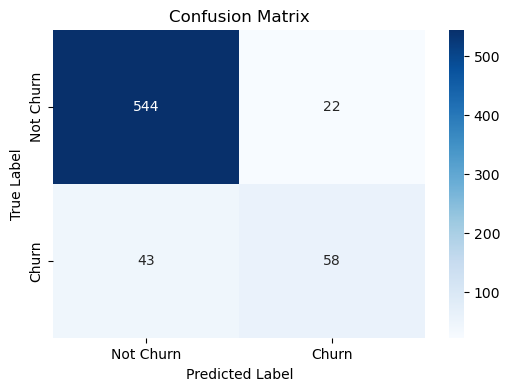

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Retrain the Model on Top Features
rf.fit(X_train_top, y_train_encoded)

# Make predictions on the test set
y_pred = rf.predict(X_test_top)

# Print classification report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])  # Replace labels for clarity
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score

# Perform 5 fold cross vaildation
cv_scores = cross_val_score(rf, X_train_top, y_train_encoded,cv=5, scoring='accuracy')

print(f"cross-validation scores: {cv_scores}")
print(f"mean cross-validation score: {cv_scores.mean():4f}")

cross-validation scores: [0.91947566 0.90806754 0.89681051 0.9043152  0.93433396]
mean cross-validation score: 0.912601


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       566
           1       0.70      0.66      0.68       101

    accuracy                           0.91       667
   macro avg       0.82      0.81      0.81       667
weighted avg       0.90      0.91      0.90       667



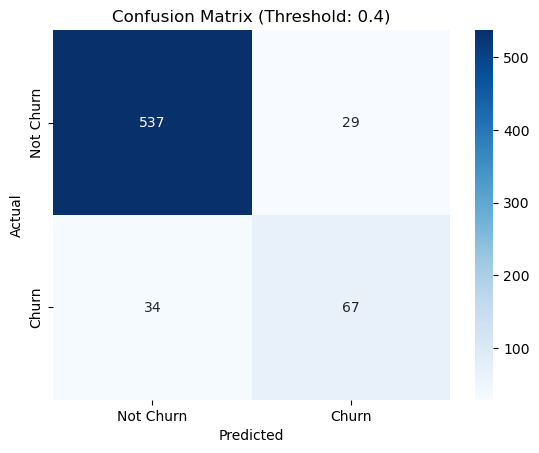

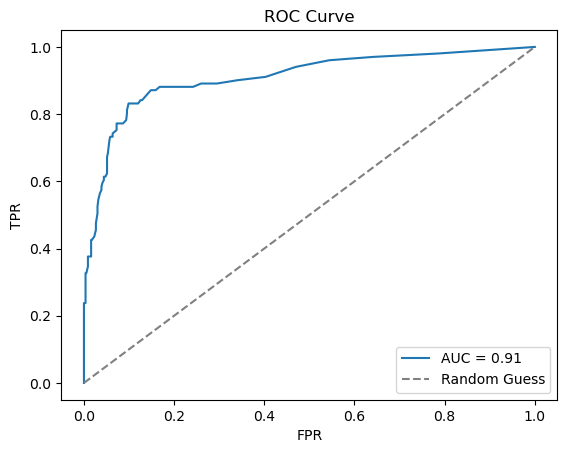

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities and adjust threshold
threshold = 0.4
y_prob = rf.predict_proba(X_test_top)[:, 1]
y_pred = (y_prob >= threshold).astype(int)

# Evaluation: Classification Report and Confusion Matrix
print(classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_encoded, y_prob):.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray', label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()
